# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [4]:
from google.colab import files

uploaded = files.upload()

Saving fuel_econ.csv to fuel_econ.csv


In [5]:
import os
print(os.listdir())

['.config', 'fuel_econ.csv', 'sample_data']


In [6]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fuel_econ= pd.read_csv('/content/fuel_econ.csv')

# creating a Dataframe object
df = pd.DataFrame(fuel_econ)

# Identify numerical columns (excluding categorical ones)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Standardize numerical columns
df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
standardized_data = df[num_cols] # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,-1.736919,-1.475648,0.283066,0.650453,1.466910,-1.217223,-0.859851,-0.852321,-1.290466,-1.392297,-1.008194,1.022708,-0.950459,-0.945635
1,-1.736463,-1.475648,-0.781716,-0.727906,1.864525,-1.217223,0.006426,-0.117419,0.184923,-0.039195,0.071855,-0.298512,0.188584,0.194233
2,-1.736006,-1.475648,0.283066,0.497302,1.864525,-1.217223,-0.694328,-0.753149,-0.591944,-0.851641,-0.686252,0.567862,-0.380937,-0.375701
3,-1.735549,-1.475648,0.283066,0.497302,1.864525,-1.217223,-0.782701,-0.830180,-0.827279,-1.027457,-0.818547,0.751966,-0.380937,-0.375701
4,-1.735092,-1.475648,-0.781716,-0.421604,-0.627198,0.734797,0.471023,0.433092,0.967393,0.992405,0.647976,-0.720869,1.327627,1.334101


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [8]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
print("Covariance Matrix:\n",cov_matrix)

Covariance Matrix:
 [[ 1.          0.98566773 -0.06009618 -0.07466587 -0.00656857 -0.02195097
   0.09179979  0.09122527  0.09059304  0.09535947  0.09380298 -0.0997169
  -0.12787305 -0.12232093]
 [ 0.98566773  1.         -0.05531293 -0.07042368  0.00623239 -0.03364318
   0.06805006  0.06674239  0.0732897   0.07764062  0.07199349 -0.08116464
  -0.14982946 -0.1451408 ]
 [-0.06009618 -0.05531293  1.          0.93387245  0.24757081 -0.00426438
  -0.69310259 -0.66602886 -0.76627474 -0.77150323 -0.73802323  0.84827383
  -0.78385803 -0.78181544]
 [-0.07466587 -0.07042368  0.93387245  1.          0.25933608  0.02207168
  -0.7134791  -0.68616562 -0.78398415 -0.78845698 -0.75839716  0.85537478
  -0.79343231 -0.79121609]
 [-0.00656857  0.00623239  0.24757081  0.25933608  1.         -0.66564191
  -0.27810882 -0.27254576 -0.29680809 -0.29850423 -0.29088306  0.28720012
  -0.29608842 -0.2931564 ]
 [-0.02195097 -0.03364318 -0.00426438  0.02207168 -0.66564191  1.
   0.03518763  0.03786895  0.0749516   0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [9]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition

# Print the eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [8.95492947e+00 2.06725328e+00 1.59323656e+00 6.70416990e-01
 3.01607334e-01 1.60976566e-01 1.25518516e-01 6.40042264e-02
 3.23446619e-02 1.36927574e-02 9.24391778e-03 4.24529707e-03
 2.14303627e-03 3.87387264e-04]

Eigenvectors:
 [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619e-02  5.690

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [10]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvalues = eigenvalues[sorted_indices]

print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [8.95492947e+00 2.06725328e+00 1.59323656e+00 6.70416990e-01
 3.01607334e-01 1.60976566e-01 1.25518516e-01 6.40042264e-02
 3.23446619e-02 1.36927574e-02 9.24391778e-03 4.24529707e-03
 2.14303627e-03 3.87387264e-04]

Sorted Eigenvectors:
 [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [13]:
# Step 6: Project Data onto Principal Components
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Decide on the number of principal components to keep
principal_components = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, principal_components)  # Project data onto the principal components

# Display the first 5 rows of reduced data
print("Reduced Data (First 5 Rows):\n", reduced_data[:5])

Reduced Data (First 5 Rows):
 [[-3.1910559   1.98744119 -1.85119243 -0.41127775  0.02012798]
 [ 0.38747769  1.99169227 -2.47938762 -0.76199385 -0.61163585]
 [-2.0912188   2.03717464 -2.20553336 -0.16626262 -0.4198442 ]
 [-2.37883798  2.06353891 -2.18924185 -0.27744978 -0.39131766]
 [ 2.59693755  2.50388336  0.47493676 -0.09057204 -0.30385854]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [14]:
# Step 7: Output the Reduced Data
reduced_data = standardized_data.dot(eigenvectors)
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print("Reduced Data: \n", reduced_data[:5])  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 14)
Reduced Data: 
          0         1         2         3         4         5         6   \
0 -3.191056  1.987441 -1.851192 -0.411278  0.020128  0.320255 -0.581652   
1  0.387478  1.991692 -2.479388 -0.761994 -0.611636 -0.075557 -0.404010   
2 -2.091219  2.037175 -2.205533 -0.166263 -0.419844  0.022871 -0.077990   
3 -2.378838  2.063539 -2.189242 -0.277450 -0.391318  0.181350 -0.076310   
4  2.596938  2.503883  0.474937 -0.090572 -0.303859 -0.299995  0.419311   

         7         8         9         10        11        12        13  
0  0.219748  0.122467  0.153224 -0.059262 -0.002035 -0.002073  0.016500  
1 -0.017484  0.272492  0.152181 -0.151202 -0.019153  0.004739  0.000074  
2  0.105820  0.123375  0.171732 -0.161689 -0.008616 -0.033570 -0.005773  
3  0.088454 -0.044754  0.177032 -0.135869 -0.000958 -0.022249 -0.004011  
4  0.225865 -0.146199  0.206855  0.026982 -0.030111  0.004041 -0.006697  


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

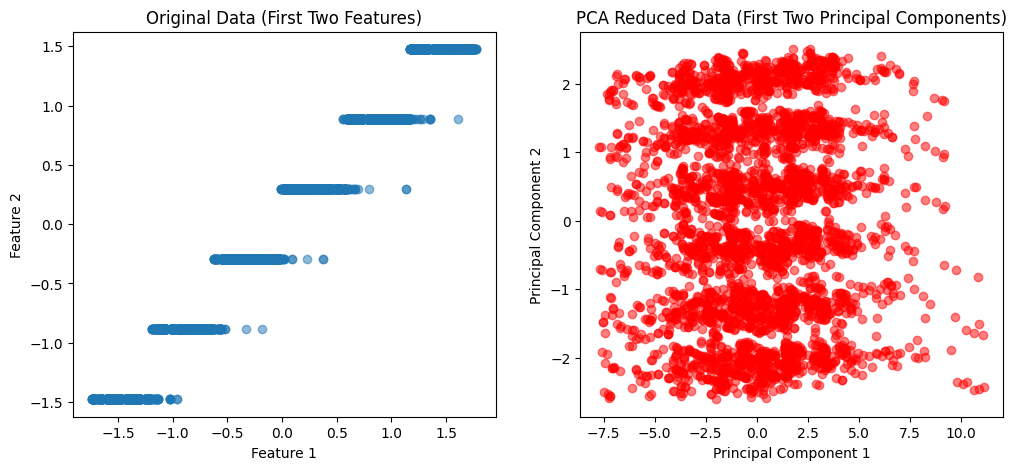

In [12]:
# Step 8: Visualize Before and After PCA
plt.figure(figsize=(12, 5))

# Plot original data (first two features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], alpha=0.5)
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], alpha=0.5, color='red')
plt.title("PCA Reduced Data (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()